In [3]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from common import helper as h

In [50]:
# load the Q-value array
env_name = "CartPole-v0"

work_dir = Path().cwd()/'results'/f'{env_name}'
data = h.load_object(work_dir/'q_table.pkl') # load q_table 
q_axis, q_table = data['axis'], data['q_table']
x_axis, th_axis = q_axis[0], q_axis[2]  #get the axis for x and \theta

discr = q_table.shape[0]


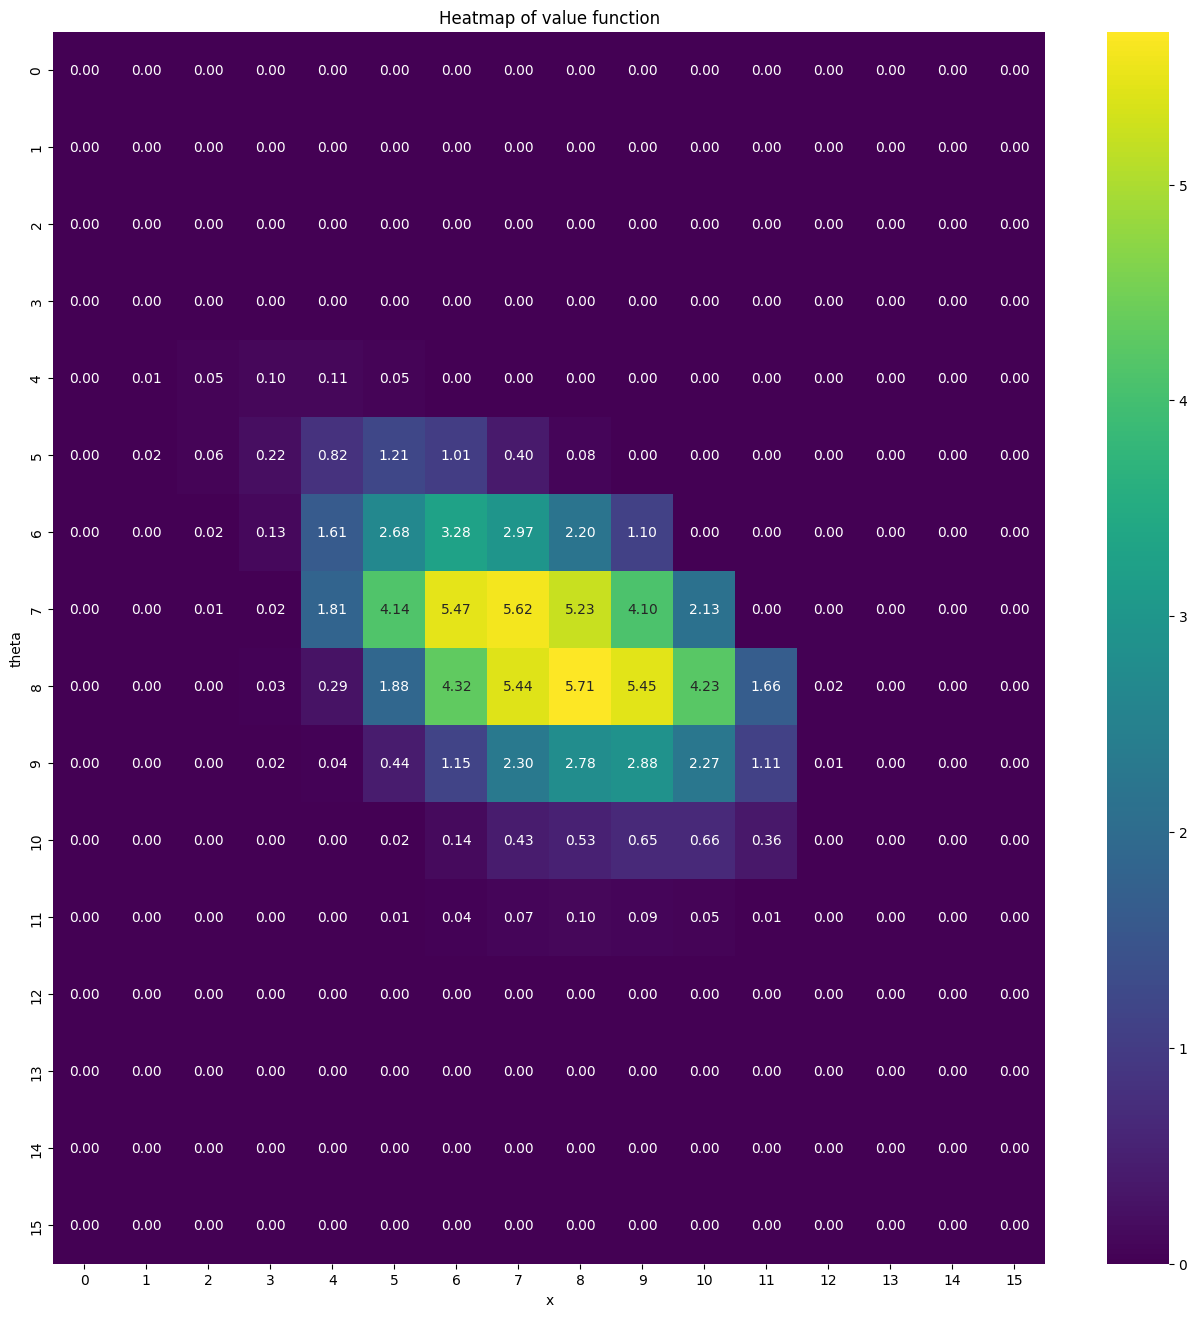

In [64]:
from itertools import product

# TODO: Task 1.2 Plot the heatmap of the value function
########## Your code begins here. ##########
# Calculate the value function
axis_lengths = [len(axis) for axis in q_axis]

values = np.zeros(q_table.shape[:-1]) 
heatmap = np.zeros([q_table.shape[1], q_table.shape[3]]) 
for i,j,k,l in product(*[range(length) for length in axis_lengths]):
    values[i][j][k][l] = np.max(q_table[i][j][k][l])
# Plot the heatmap
for i, j in product(range(q_table.shape[1]), range(q_table.shape[3])):
    heatmap[i, j] = np.mean(values[:][i][:][j])
# plt.plot(heatmap)
plt.figure(figsize=(q_table.shape[1], q_table.shape[3]))  # Adjust figsize to be 16x16 inches
sns.heatmap(heatmap, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Heatmap of value function')
plt.xlabel('x')
plt.ylabel('theta')
plt.show()


########## Your code ends here. ##########

In [65]:
# save value 
h.save_object({'value': values, 'axis': q_axis},
                work_dir/"value.pkl")